In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

# Ex 2: apply GMM algorithm built in the first question or used sklearn library? 
Try different number of cluster to see how the result change? Draw the elbow and Silhouette score for the above dataset.

In [2]:
def elbow_report(X):
    meandist = []
    n_clusters = range(2,10)
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster)
        gmm.fit(X)
        meandist.append(
          sum(np.min(cdist(X, gmm.means_, 'mahalanobis', VI=gmm.precisions_), axis=1) / X.shape[0]))
        
    plt.plot(n_clusters,meandist,'bx-')
    plt.xlabel('Number of Clusters') 
    plt.ylabel('Mean Mahalanobis Distance') 
    plt.title('GMM Clustering for n_cluster= 2 to 10')
    plt.show()

In [3]:
def silhouette_score_report(X):
    n_clusters = range(2,10)
    s_score = []
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster, n_init=20, init_params='kmeans')
        labels = gmm.fit_predict(X)
        s_score.append(silhouette_score(X, labels, metric='euclidean'))

    plt.plot(n_clusters, s_score, color='black')
    plt.xlabel('n_clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Identify the number of clusters using Silhouette Score')
    plt.show()

### dataset 1

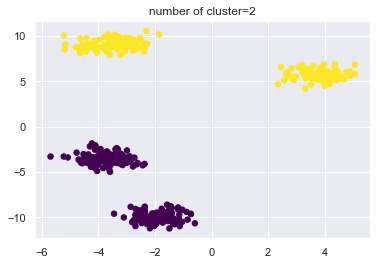

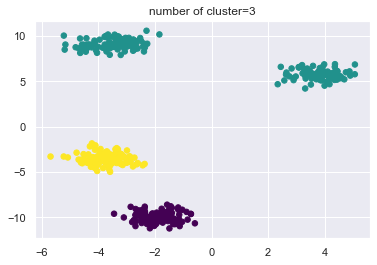

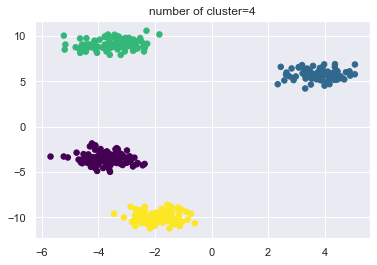

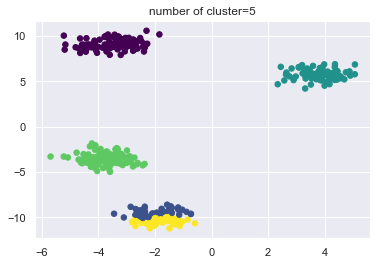

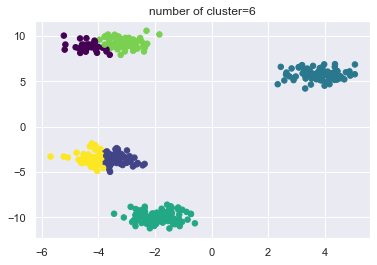

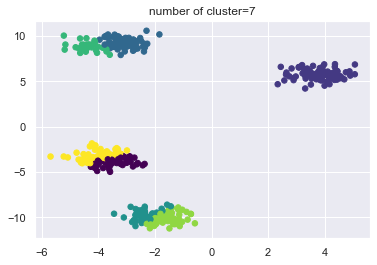

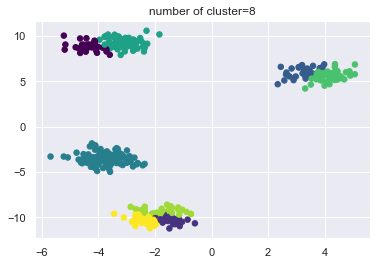

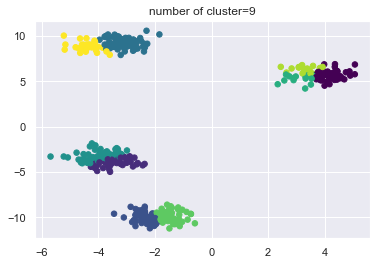

In [4]:
X1, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60)
X1 = X1[:, ::-1] # flip axes for better plotting

for i in range(2, 10):
    gmm = GaussianMixture(n_components=i).fit(X1)
    labels = gmm.predict(X1)
    plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=30, cmap='viridis')
    plt.title(f'number of cluster={i}')
    plt.show()

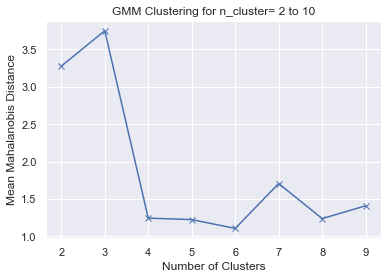

In [5]:
elbow_report(X1)

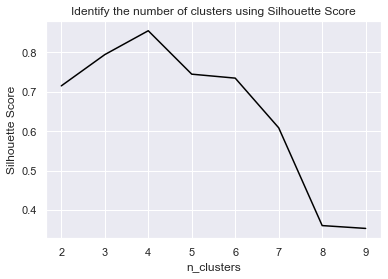

In [6]:
silhouette_score_report(X1)

### dataset 2

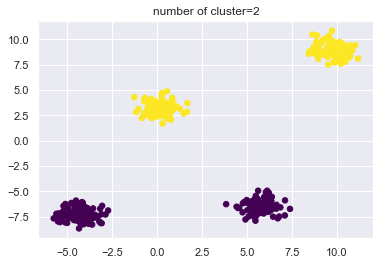

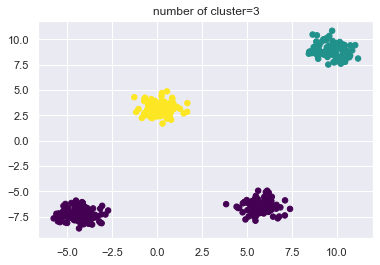

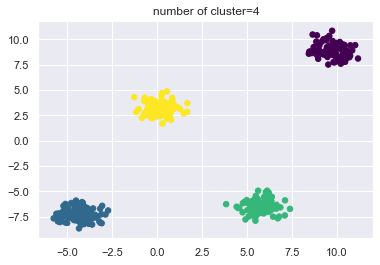

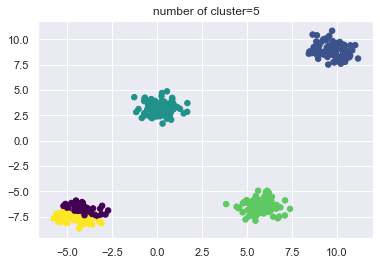

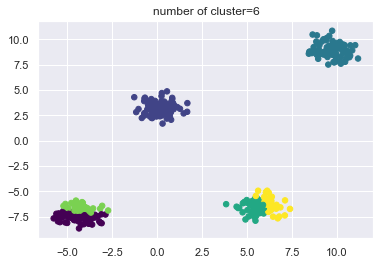

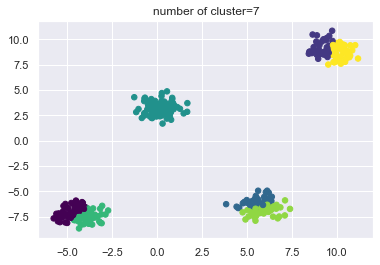

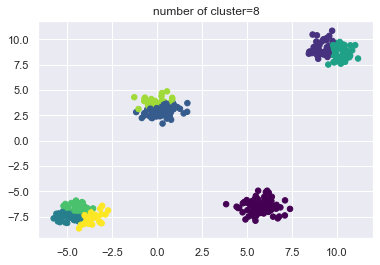

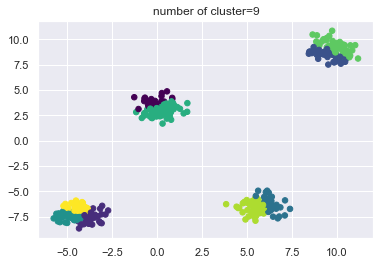

In [7]:
X2, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60)
X2 = X2[:, ::-1]

for i in range(2, 10):
    gmm = GaussianMixture(n_components=i).fit(X2)
    labels = gmm.predict(X2)
    plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=30, cmap='viridis')
    plt.title(f'number of cluster={i}')
    plt.show()

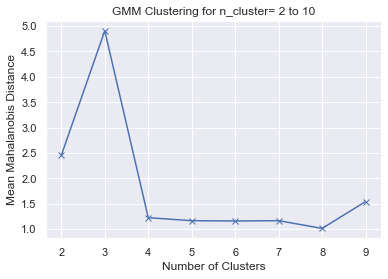

In [8]:
elbow_report(X2)

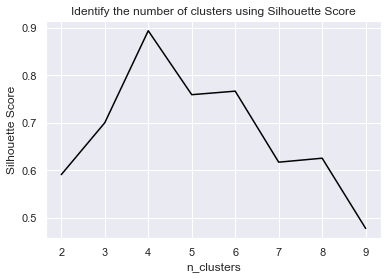

In [9]:
silhouette_score_report(X2)

### dataset 3

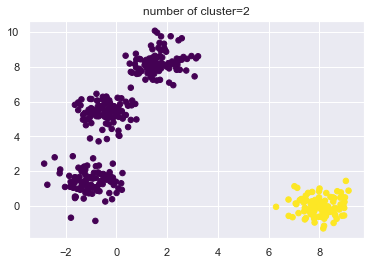

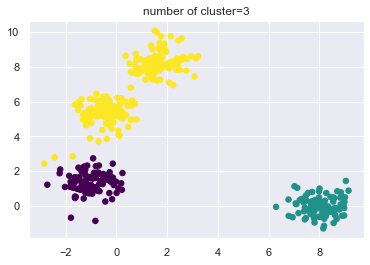

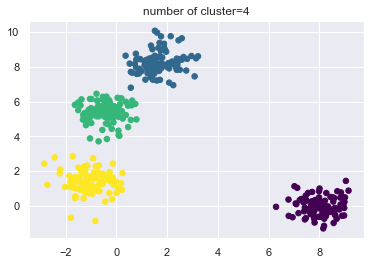

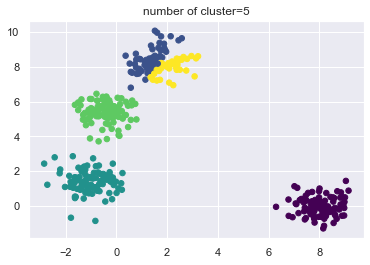

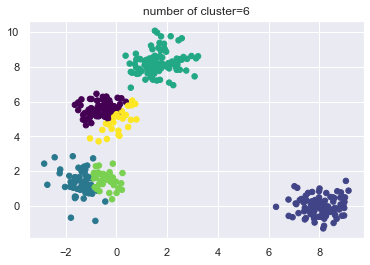

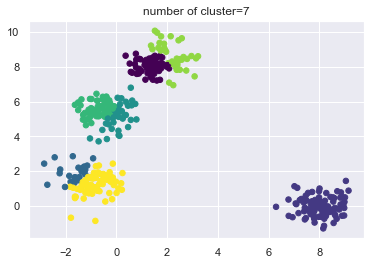

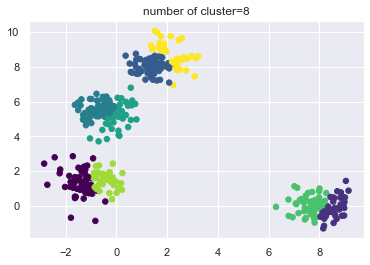

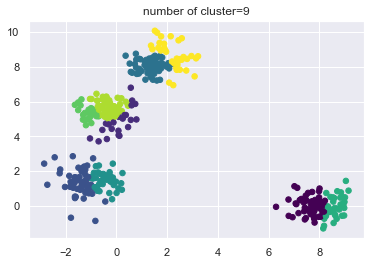

In [10]:
X3, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60)
X = X3[:, ::-1]

for i in range(2, 10):
    gmm = GaussianMixture(n_components=i).fit(X3)
    labels = gmm.predict(X3)
    plt.scatter(X3[:, 0], X3[:, 1], c=labels, s=30, cmap='viridis')
    plt.title(f'number of cluster={i}')
    plt.show()

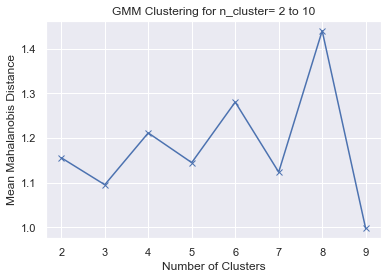

In [11]:
elbow_report(X3)

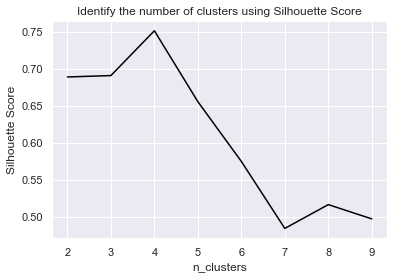

In [12]:
silhouette_score_report(X3)

# Ex 4: Find 3 examples that GMM is better than kmeans

As anisotropic and unequal variances are real limitations of the k-means algorithm, here we propose instead the use of GaussianMixture, which also assumes gaussian clusters but does not impose any constraints on their variances. 

### example 1: anisotrophical data

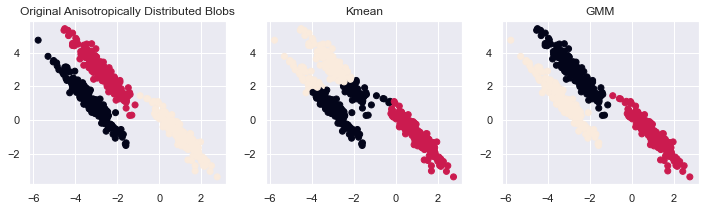

In [44]:
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X_aniso = np.dot(X, transformation)
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
##original
axs[0].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0].set_title("Original Anisotropically Distributed Blobs")

##kmean
common_params = {
    "n_init": 10,
    "random_state": random_state}
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[1].set_title("Kmean")

##gmm
y_pred = GaussianMixture(n_components=3).fit_predict(X_aniso)
axs[2].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[2].set_title("GMM")

plt.show()

### example 2: Unequal variance data

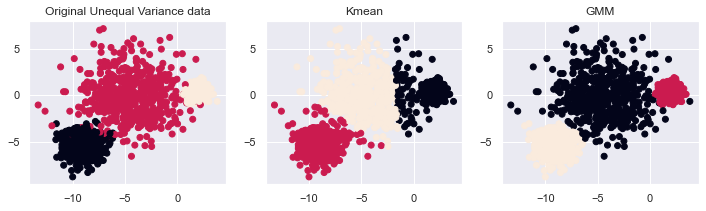

In [46]:
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X_varied, y_varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state) 
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
##original
axs[0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[0].set_title("Original Unequal Variance data")

##kmean
common_params = {
    "n_init": 10,
    "random_state": random_state}
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[1].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1].set_title("Kmean")

##gmm
y_pred = GaussianMixture(n_components=3).fit_predict(X_varied)
axs[2].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[2].set_title("GMM")

plt.show()

### example 3
K-Means is not good at finding clusters of different sizes, shapes, and densities, but GMM

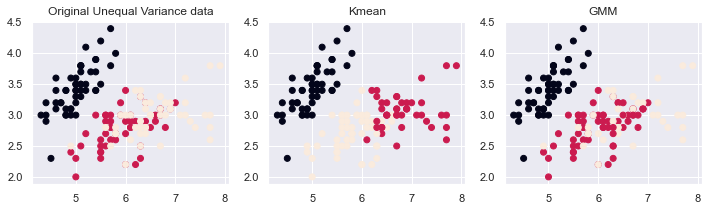

In [54]:
iris = datasets.load_iris()
X_iris = iris.data[:, :3]  # we only take the first two features.
y_iris = iris.target

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
##original
axs[0].scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris)
axs[0].set_title("Original Unequal Variance data")

##kmean
common_params = {
    "n_init": 10,
    "random_state": random_state}
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_iris)
axs[1].scatter(X_iris[:, 0], X_iris[:, 1], c=y_pred)
axs[1].set_title("Kmean")

##gmm
y_pred = GaussianMixture(n_components=3).fit_predict(X_iris)
axs[2].scatter(X_iris[:, 0], X_iris[:, 1], c=y_pred)
axs[2].set_title("GMM")

plt.show()